<a href="https://colab.research.google.com/github/YoonHyeJu/Python_ML_Guide/blob/master/%EB%8B%A4%ED%95%AD%ED%9A%8C%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처: \n', X)

일차 단항식 계수 피처: 
 [[0 1]
 [2 3]]


In [3]:
# degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)

In [4]:
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [5]:
def polynomial_func(X):
    y = 1+2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y  

In [6]:
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [7]:
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [11]:
# LinearRegression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회기 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print('Polynomial 회기 계수\n', np.round(model.coef_, 2))
print('Polynomial 회기 Shape: ', model.coef_.shape)

Polynomial 회기 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회기 Shape:  (10,)


# **사이킷런의 Pipeline을 이용해 한 번에 다항 회기를 구현.**

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

In [14]:
def polynomial_func(X):
    y = 1+2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y 

In [16]:
# pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

In [19]:
# 단항식에서 회기 계수 [1,2,0,3,0,0,0,0,0,4]

In [17]:
print('Polynomial 회기 계수\n', np.round(model.named_steps['linear'].coef_,2)) 

Polynomial 회기 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


# **과적합 & 과소적합**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [21]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi*X)

In [22]:
# X는 1~30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

In [24]:
#y 값은 코사인 기반의 true_fun에서 약간의 노이즈 변동 값을 더한 값.
y = true_fun(X) + np.random.randn(n_samples)*0.1

In [32]:
plt.figure(figsize=(30,5))
degrees = [1,4,15]

<Figure size 2160x360 with 0 Axes>


Degree 1 회기 계수는 [-1.61] 입니다
Degree 1 MSE는 0.4077289625098685 입니다

Degree 4 회기 계수는 [  0.47 -17.79  23.59  -7.26] 입니다
Degree 4 MSE는 0.043208749872320706 입니다

Degree 15 회기 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다
Degree 15 MSE는 180526263.3177066 입니다


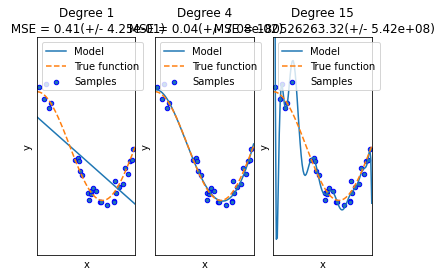

In [35]:
# 다항 회기의 degree를 1,4,15로 각각 변화시키며 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    #개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features), ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)

    # 교차검증으로 다항회기 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)

    #pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회기 계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_

    print('\nDegree {} 회기 계수는 {} 입니다'.format(degrees[i], np.round(coefficients,2)))
    print('Degree {} MSE는 {} 입니다'.format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이트 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolors='b', s=20, label="Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title("Degree {}\n MSE = {:.2f}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()